## Project definition:
The goal of this project is to develop a machine learning model that can accurately classify brain stroke from MRI images and predict the severity of the stroke using National Institutes of Health Stroke Scale (NIHSS) and Magnetic Resonance Spectroscopy (MRS) data obtained from the same images.

The project will involve collecting a dataset of MRI images from patients with and without stroke. The MRI images will be preprocessed to extract relevant features using techniques such as image registration, segmentation, and feature extraction.

The extracted features will then be used to train a machine learning model using classification algorithms such as convolutional neural networks (CNN) and support vector machines (SVM). The trained model will be evaluated using standard metrics such as accuracy, sensitivity, and specificity.

In addition to stroke classification, the project will also involve predicting the severity of the stroke using NIHSS and MRS data extracted from the MRI images. This will involve using regression techniques such as linear regression and decision trees to predict the severity of the stroke based on the extracted data.

The final product of this project will be a machine learning model that can accurately classify stroke from MRI images and predict the severity of the stroke using NIHSS and MRS data. This model can be used by radiologists and neurologists to assist in the diagnosis and treatment of stroke patients.

In [ ]:
! pip install pydicom

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 18.9 MB/s eta 0:00:00


In [ ]:
import os
import random
import numpy as np
import pydicom
from keras.preprocessing.image import ImageDataGenerator
from skimage.transform import resize

In [ ]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Set the path to your .dcm image folder
dir_path = "/content/drive/MyDrive/MRI-dataset"

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Load the DICOM images using pydicom
import os
import pydicom

# Load the DICOM files into a list
dcm_list = []
for filename in os.listdir(dir_path):
    if filename.endswith('.dcm'):
        dcm_path = os.path.join(dir_path, filename)
        dcm = pydicom.read_file(dcm_path)
        dcm_list.append(dcm)

In [ ]:
# Sort the DICOM files by instance number
dcm_list.sort(key=lambda x: x.InstanceNumber)

In [ ]:
# Extract the pixel data from the DICOM files and resize them to a fixed shape
dcm_array = []
for dcm in dcm_list:
    image = resize(dcm.pixel_array, (256, 256))
    dcm_array.append(image)

In [ ]:
# Stack the images into a 3D array
dcm_array = np.stack(dcm_array)

In [ ]:
# Normalize the pixel values to have values between 0 and 1
dcm_array = (dcm_array - np.min(dcm_array)) / (np.max(dcm_array) - np.min(dcm_array))

In [ ]:

# Define an augmentation generator for the images
aug_generator = ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True,
    vertical_flip=True
)

In [ ]:
# Apply the augmentation generator to the images
dcm_array_augmented = np.zeros_like(dcm_array)
for i in range(dcm_array.shape[0]):
    image = dcm_array[i, :, :]
    image = np.expand_dims(image, axis=-1)
    image_augmented = aug_generator.random_transform(image)
    dcm_array_augmented[i, :, :] = np.squeeze(image_augmented)

In [ ]:
import matplotlib.pyplot as plt

def show_image(image):
    plt.imshow(image, cmap='gray')
    plt.axis('off')
    plt.show()

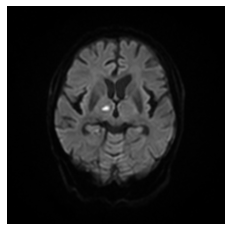

In [ ]:
image = dcm_array[0]
show_image(image)